INSTITUTO TECNOLOGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY

 CAMPUS PUEBLA

ANALITICA DE DATOS Y HERRAMIENTAS DE INTELIGENCIA ARTIFICIAL II

REGRESIONES MÚLTIPLES

ALUMNO:

Ángel Roberto González Angulo | A01735880

PROFESORES:

Alfredo García Suárez

GRUPO:
501


FECHA DE ENTREGA:
07/10/2024

# Librerías y carga de datos

In [1367]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1368]:
df = pd.read_excel("OttawaSturges.xlsx")
df.drop(["Unnamed: 0","price"], axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostResponseCat,hostAcceptanceCat,hostVerifCat,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-21,city scrape,Glenn,within an hour,"['email', 'phone']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Coffee maker"", ""Smoke ...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-21,city scrape,Daniel,within a day,"['email', 'phone']",Rideau-Goulbourn,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Kitchen"", ""Sha...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-21,city scrape,Ela,within an hour,"['email', 'phone']",Capital,Private room in home,Private room,1 private bath,"[""Free washer \u2013 In building"", ""Extra pill...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(0 - 1) Una cama,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-21,city scrape,William,within an hour,['phone'],Gloucester-South Nepean,Entire home,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Host greets you"", ""Smo...",...,(91 - 100%) Tasa de respuesta perfecta,(74 - 82%) Muy bueno,(0 - 1) Verificación básica,(3 - 5) Camas múltiples,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Self check-in""...",...,(91 - 100%) Tasa de respuesta perfecta,(83 - 91%) Alto,(3) Verificación completa,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
5,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire townhouse,Entire home/apt,1 bath,"[""Self check-in"", ""Free driveway parking on pr...",...,(91 - 100%) Tasa de respuesta perfecta,(83 - 91%) Alto,(3) Verificación completa,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [1369]:
# Separamos los datos cuantitativos
df = df.select_dtypes(np.number)
df

,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,...,host_response_time_num,neighbourhood_Category_num,bathroom_text_num,beds,review_scores_value,reviews_per_month,review_scores_location,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,1369632,2011,1,1,1,1,45.390840,-75.756210,1.0,1,...,3,2,3,3,5,0.65,5,5,5,5
1,415201,2011,0,1,1,1,45.168200,-75.712080,1.0,2,...,1,3,3,2,5,0.04,5,5,5,5
2,2401179,2012,1,5,1,1,45.405500,-75.676120,1.0,1,...,3,2,4,1,5,0.12,5,5,5,5
3,2058676,2012,1,1,1,1,45.269100,-75.721970,1.0,5,...,3,2,3,4,5,0.57,5,5,5,5
4,3201295,2012,0,6,1,1,45.404550,-75.731300,1.0,2,...,3,2,3,2,5,0.09,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,104583371,2016,0,3,1,1,45.323071,-75.607969,1.0,1,...,3,2,4,1,5,1.16,5,5,5,5
2858,348027803,2020,1,2,1,1,45.419361,-75.667223,1.0,1,...,3,3,3,1,5,1.16,5,5,5,5
2859,85297148,2016,0,84,1,1,45.093966,-75.595666,3.0,4,...,3,2,3,4,5,1.16,5,5,5,5
2860,21218752,2014,0,1,1,1,45.402610,-75.730990,1.0,2,...,3,2,3,1,5,1.16,5,5,5,5


In [1370]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
corrTabla = abs(df.corr())
corrTabla

,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,...,host_response_time_num,neighbourhood_Category_num,bathroom_text_num,beds,review_scores_value,reviews_per_month,review_scores_location,review_scores_rating,review_scores_cleanliness,review_scores_communication
host_id,1.000000,0.978197,0.041056,0.148848,0.227036,0.160939,0.168459,0.024808,0.053916,0.032607,...,0.051036,0.032957,0.032431,0.032600,0.011717,0.100327,0.018576,0.002493,0.036411,0.007485
host_since,0.978197,1.000000,0.035841,0.136616,0.221458,0.160906,0.161580,0.024865,0.054113,0.027775,...,0.063867,0.034632,0.031753,0.038411,0.020098,0.107071,0.022636,0.003747,0.031133,0.002593
host_is_superhost,0.041056,0.035841,1.000000,0.122485,0.086512,0.147664,0.064239,0.036355,0.101777,0.071125,...,0.188698,0.032355,0.000357,0.094979,0.141566,0.180295,0.105707,0.142928,0.135385,0.101588
host_listings_count,0.148848,0.136616,0.122485,1.000000,0.041402,0.047697,0.053106,0.058497,0.045751,0.056410,...,0.068758,0.011781,0.071609,0.036876,0.161306,0.088351,0.053612,0.154757,0.106547,0.172491
host_has_profile_pic,0.227036,0.221458,0.086512,0.041402,1.000000,0.129138,0.052801,0.002596,0.020073,0.044513,...,0.088668,0.007477,0.014333,0.006706,0.010529,0.032658,0.001360,0.014310,0.022187,0.026476
host_identity_verified,0.160939,0.160906,0.147664,0.047697,0.129138,1.000000,0.026414,0.005948,0.016980,0.009126,...,0.038680,0.004773,0.021856,0.032088,0.000283,0.030084,0.021122,0.010723,0.025298,0.015666
latitude,0.168459,0.161580,0.064239,0.053106,0.052801,0.026414,1.000000,0.421120,0.175858,0.087439,...,0.018577,0.003244,0.066906,0.007230,0.072335,0.040377,0.020104,0.066019,0.054089,0.023818
longitude,0.024808,0.024865,0.036355,0.058497,0.002596,0.005948,0.421120,1.000000,0.055849,0.044593,...,0.033186,0.039824,0.009075,0.055671,0.009282,0.034426,0.014012,0.017602,0.009889,0.018083
bathrooms,0.053916,0.054113,0.101777,0.045751,0.020073,0.016980,0.175858,0.055849,1.000000,0.643555,...,0.034191,0.020004,0.131628,0.478371,0.062708,0.007807,0.032796,0.046436,0.030645,0.003820
bedrooms,0.032607,0.027775,0.071125,0.056410,0.044513,0.009126,0.087439,0.044593,0.643555,1.000000,...,0.004636,0.052248,0.298946,0.628469,0.049632,0.037569,0.030059,0.029498,0.000923,0.010189


<Axes: >

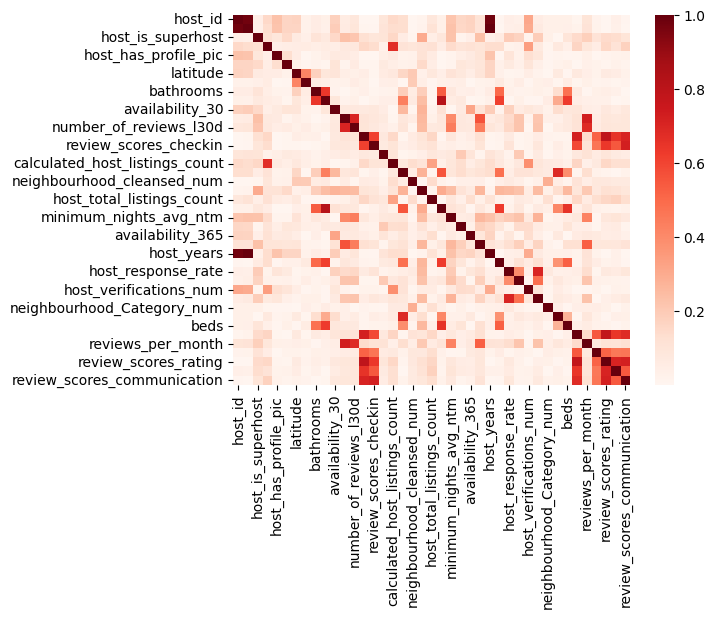

In [1371]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corrTabla, cmap = 'Reds')
Heat_Map

In [1372]:
# Hacemos una copia para guardar las predicciones que tengamos en el df
dfPredict = df.copy()

# Modelos de regresión lineal múltiple

### Host Id

In [1373]:
# Host Id
# Filtrando las correlaciones fuertes
hostModel = abs(df.corr()['host_id'])
hostModel = hostModel[hostModel.abs() > 0.2].sort_values(ascending=False).to_frame()
hostModel

,host_id
host_id,1.000000
host_since,0.978197
host_years,0.978197
host_verifications_num,0.309976
host_has_profile_pic,0.227036
minimum_nights_avg_ntm,0.218381


<Axes: >

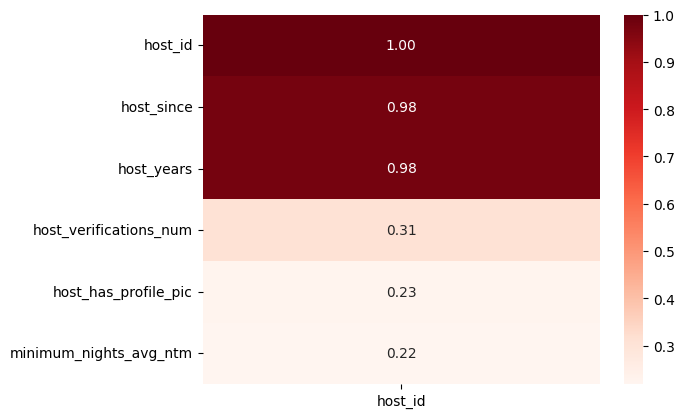

In [1374]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(hostModel, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map1

<Axes: xlabel='host_years', ylabel='host_id'>

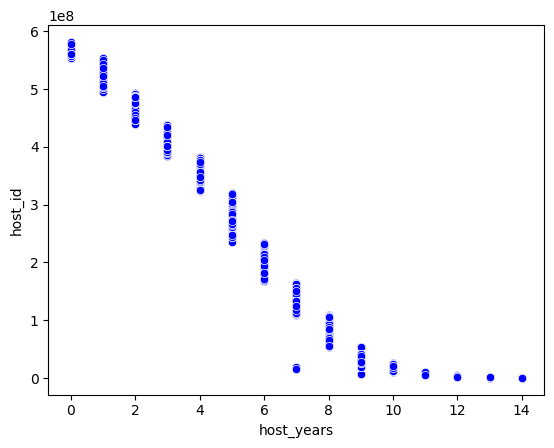

In [1375]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'host_years', y = 'host_id', color = 'blue', data = df) # Independiente, Dependiente, color, df

In [1376]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["host_years","host_verifications_num"]] # Independiente = x
Var_Dep = df[["host_id"]] # Dependiente = y

# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_years', 'host_verifications_num'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([[-55510855.55999132,  -7183604.40751869]]),
 'rank_': 2,
 'singular_': array([174.52512184,  23.57229425]),
 'intercept_': array([5.71933115e+08])}

**Modelo Matemático: y = -55510855.55999132x1 - 7183604.40751869x2  + 5.71933115e+08**

In [1377]:
# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[["host_years","host_verifications_num"]])
y_pred

array([[-1.64075216e+08],
       [-1.64075216e+08],
       [-1.08564361e+08],
       ...,
       [ 1.06295457e+08],
       [-4.72625388e+06],
       [ 2.87195233e+08]])

In [1378]:
# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_Host_id', y_pred)
dfPredict

,Predict_Host_id,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,...,host_response_time_num,neighbourhood_Category_num,bathroom_text_num,beds,review_scores_value,reviews_per_month,review_scores_location,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,-1.640752e+08,1369632,2011,1,1,1,1,45.390840,-75.756210,1.0,...,3,2,3,3,5,0.65,5,5,5,5
1,-1.640752e+08,415201,2011,0,1,1,1,45.168200,-75.712080,1.0,...,1,3,3,2,5,0.04,5,5,5,5
2,-1.085644e+08,2401179,2012,1,5,1,1,45.405500,-75.676120,1.0,...,3,2,4,1,5,0.12,5,5,5,5
3,-1.013808e+08,2058676,2012,1,1,1,1,45.269100,-75.721970,1.0,...,3,2,3,4,5,0.57,5,5,5,5
4,-1.157480e+08,3201295,2012,0,6,1,1,45.404550,-75.731300,1.0,...,3,2,3,2,5,0.09,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,1.134791e+08,104583371,2016,0,3,1,1,45.323071,-75.607969,1.0,...,3,2,4,1,5,1.16,5,5,5,5
2858,3.355225e+08,348027803,2020,1,2,1,1,45.419361,-75.667223,1.0,...,3,3,3,1,5,1.16,5,5,5,5
2859,1.062955e+08,85297148,2016,0,84,1,1,45.093966,-75.595666,3.0,...,3,2,3,4,5,1.16,5,5,5,5
2860,-4.726254e+06,21218752,2014,0,1,1,1,45.402610,-75.730990,1.0,...,3,2,3,1,5,1.16,5,5,5,5


<Axes: xlabel='host_years', ylabel='host_id'>

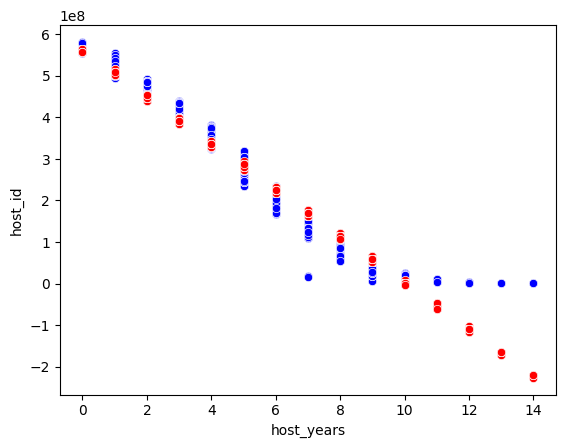

In [1379]:
# Gráfica de comparación
sns.scatterplot(x = 'host_years', y = 'host_id', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'host_years', y = 'Predict_Host_id', color = "red", data = dfPredict)

In [1380]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_1 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_1 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_1 = np.sqrt(coef_Deter_1)
coef_Correl_1 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.978345666928929

Modelo 1: 0.9781973436355771 (Solo host_since)

Modelo 2: 0.9783004660499511 (host_since, host_years, host_verifications_num)

Modelo 3: 0.9781747990650506 (host_since, host_years)

Modelo 4: 0.9783004660499511 (host_since, host_verifications_num)

Modelo 5: 0.978345666928929 (host_years, host_verifications_num)

### host_acceptance_rate

<Axes: >

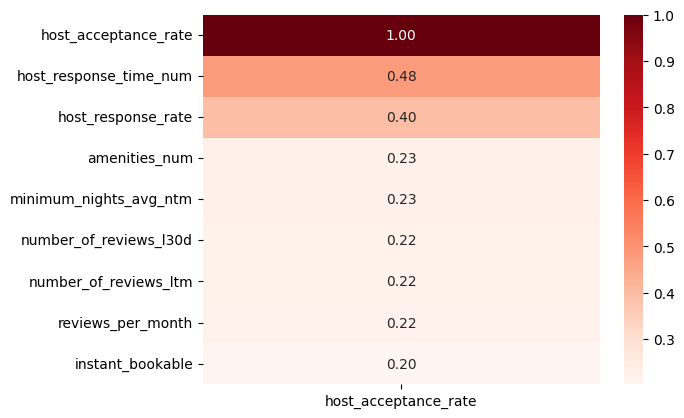

In [1381]:
# Filtrando las correlaciones fuertes
AcceptanceModel = abs(df.corr()['host_acceptance_rate'])
AcceptanceModel = AcceptanceModel[AcceptanceModel.abs() > 0.2].sort_values(ascending=False).to_frame()
AcceptanceModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(AcceptanceModel, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map2

<Axes: xlabel='host_response_time_num', ylabel='host_acceptance_rate'>

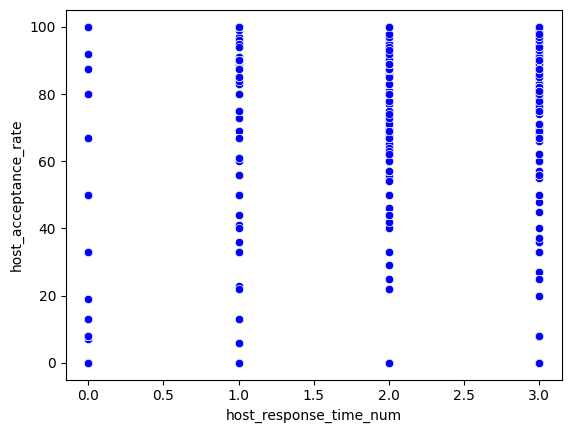

In [1382]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'host_response_time_num', y = 'host_acceptance_rate', color = 'blue', data = df) # Independiente, Dependiente, color, df

In [1383]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["host_response_time_num","host_response_rate","amenities_num"]] # Independiente = x
Var_Dep = df[["host_acceptance_rate"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[["host_response_time_num","host_response_rate","amenities_num"]])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_Host_Acceptance', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_2 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_2 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_2 = np.sqrt(coef_Deter_2)
coef_Correl_2 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.49822547249878973

In [1384]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_time_num', 'host_response_rate', 'amenities_num'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([[11.2809516 ,  0.11877296,  0.14567697]]),
 'rank_': 3,
 'singular_': array([978.7527919 , 744.91451452,  27.73326913]),
 'intercept_': array([40.70576451])}

**Modelo Matemático: y = 11.2809516x1 + 0.11877296x2 + 0.14567697x3 + 40.70576451**

<Axes: xlabel='host_response_time_num', ylabel='host_acceptance_rate'>

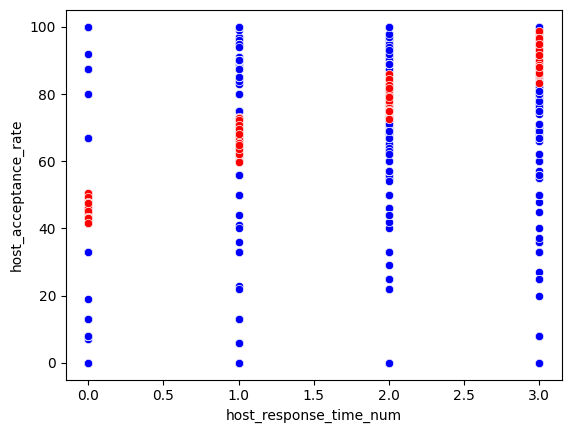

In [1385]:
# Gráfica de comparación
sns.scatterplot(x = 'host_response_time_num', y = 'host_acceptance_rate', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'host_response_time_num', y = 'Predict_Host_Acceptance', color = "red", data = dfPredict)

### host_is_superhost

<Axes: >

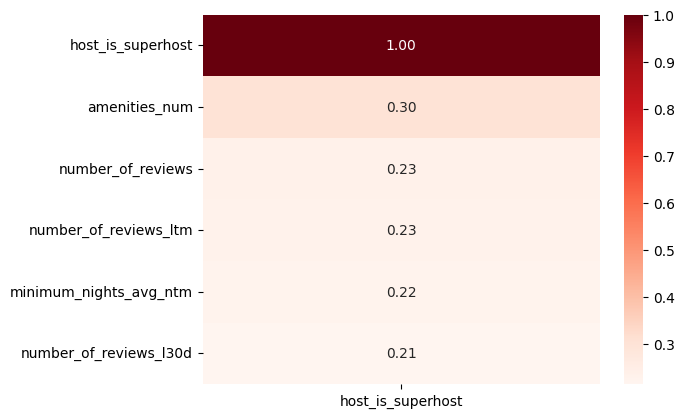

In [1386]:
# Filtrando las correlaciones fuertes
SuperHostModel = abs(df.corr()['host_is_superhost'])
SuperHostModel = SuperHostModel[SuperHostModel.abs() > 0.2].sort_values(ascending=False).to_frame()
SuperHostModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map3 = sns.heatmap(SuperHostModel, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map3

In [1387]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["amenities_num","number_of_reviews","number_of_reviews_ltm","minimum_nights_avg_ntm","number_of_reviews_l30d"]] # Independiente = x
Var_Dep = df[["host_is_superhost"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[["amenities_num","number_of_reviews","number_of_reviews_ltm","minimum_nights_avg_ntm","number_of_reviews_l30d"]])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_SuperHost', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_3 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_3 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_3 = np.sqrt(coef_Deter_3)
coef_Correl_3 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.3671235204294739

In [1388]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['amenities_num', 'number_of_reviews', 'number_of_reviews_ltm',
        'minimum_nights_avg_ntm', 'number_of_reviews_l30d'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([[ 0.0083133 ,  0.00119978,  0.00118721, -0.0040871 ,  0.00702455]]),
 'rank_': 5,
 'singular_': array([2797.9364773 , 1097.64657216,  801.34239804,  697.01760967,
          82.62049047]),
 'intercept_': array([0.12440914])}

**Modelo Matemático: y = 0.0083133x1 + 0.00119978x2 + 0.00118721x3 - 0.0040871x4 + 0.00702455x5 + 0.12440914**

### host_total_listings_count

<Axes: >

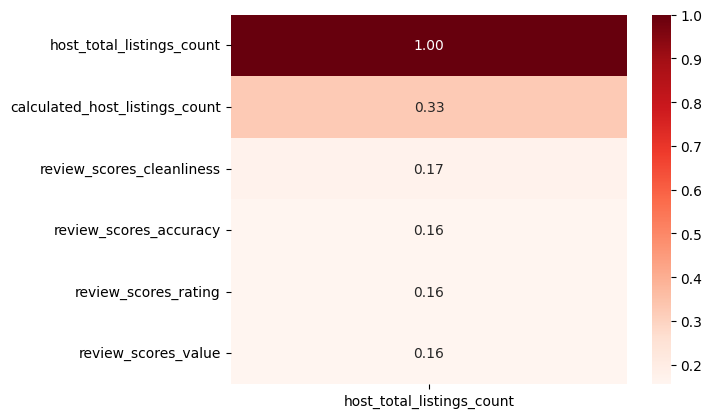

In [1389]:
# Filtrando las correlaciones fuertes
hostTotalListings = abs(df.corr()['host_total_listings_count'])
hostTotalListings = hostTotalListings[hostTotalListings.abs() > 0.15].sort_values(ascending=False).to_frame()
hostTotalListings
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map4 = sns.heatmap(hostTotalListings, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map4

In [1390]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[['calculated_host_listings_count','review_scores_cleanliness', 'review_scores_accuracy','review_scores_rating', 'review_scores_value']] # Independiente = x
Var_Dep = df[["host_total_listings_count"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[['calculated_host_listings_count','review_scores_cleanliness', 'review_scores_accuracy','review_scores_rating', 'review_scores_value']])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_Host_TotalListings', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_4 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_4 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_4 = np.sqrt(coef_Deter_4)
coef_Correl_4 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.3527150901723105

In [1391]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['calculated_host_listings_count', 'review_scores_cleanliness',
        'review_scores_accuracy', 'review_scores_rating',
        'review_scores_value'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([[ 0.43929019, -4.1929879 , -1.73909807,  0.32180385, -0.76683234]]),
 'rank_': 5,
 'singular_': array([623.31163448,  37.04824916,  13.47504093,  11.12535631,
          8.80720856]),
 'intercept_': array([36.69186559])}

**Modelo Matemático: y = 0.43929019x1 - 4.1929879x2 - 1.73909807x3 + 0.32180385x4 - 0.76683234x5 + 36.69186559**

<Axes: xlabel='calculated_host_listings_count', ylabel='host_total_listings_count'>

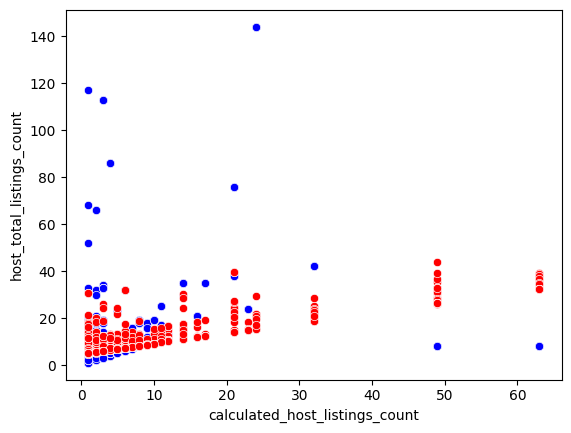

In [1392]:
# Gráfica de comparación
sns.scatterplot(x = 'calculated_host_listings_count', y = 'host_total_listings_count', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'calculated_host_listings_count', y = 'Predict_Host_TotalListings', color = "red", data = dfPredict)

### room_type

<Axes: >

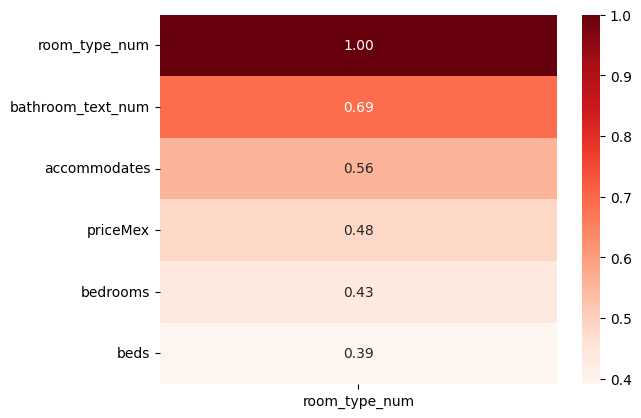

In [1393]:
# Filtrando las correlaciones fuertes
roomTypeModel = abs(df.corr()['room_type_num'])
roomTypeModel = roomTypeModel[roomTypeModel.abs() > 0.30].sort_values(ascending=False).to_frame()
roomTypeModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map5 = sns.heatmap(roomTypeModel, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map5

In [1394]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[['bathroom_text_num', 'accommodates', 'priceMex', 'bedrooms','beds']] # Independiente = x
Var_Dep = df[["room_type_num"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[['bathroom_text_num', 'accommodates', 'priceMex', 'bedrooms','beds']])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_RoomType', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_5 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_5 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_5 = np.sqrt(coef_Deter_5)
coef_Correl_5 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.7581887797315067

Modelo 1: 0.9781973436355771 (Solo host_since)

Modelo 2: 0.9783004660499511 (host_since, host_years, host_verifications_num)

Modelo 3: 0.9781747990650506 (host_since, host_years)

Modelo 4: 0.9783004660499511 (host_since, host_verifications_num)

Modelo 5: 0.978345666928929 (host_years, host_verifications_num)

In [1395]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathroom_text_num', 'accommodates', 'priceMex', 'bedrooms',
        'beds'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([[ 3.40523982e-01, -6.23486074e-02, -4.28239338e-05,
          1.97891053e-02, -7.63765426e-03]]),
 'rank_': 5,
 'singular_': array([7.69385314e+04, 1.06825430e+02, 5.00892398e+01, 3.80802385e+01,
        3.14700255e+01]),
 'intercept_': array([-0.49720944])}

**Modelo Matemático: y = 3.40523982e-01x1 - 6.23486074e-02x2 - 4.28239338e-05x3 + 1.97891053e-02x4 - 7.63765426e-03x5 - 0.49720944**

<Axes: xlabel='accommodates', ylabel='room_type_num'>

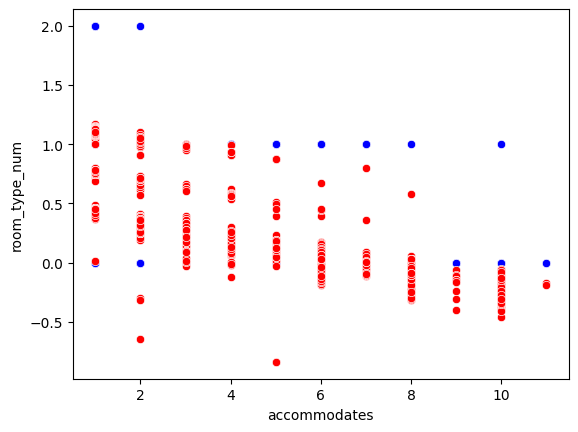

In [1396]:
# Gráfica de comparación
sns.scatterplot(x = 'accommodates', y = 'room_type_num', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'accommodates', y = 'Predict_RoomType', color = "red", data = dfPredict)

### accommodates

<Axes: >

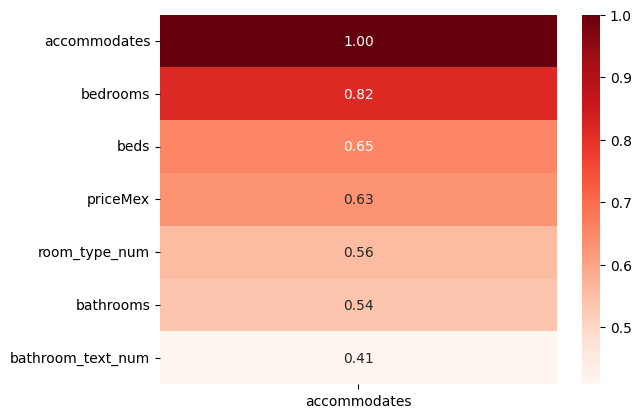

In [1397]:
# Filtrando las correlaciones fuertes
accomodatesModel = abs(df.corr()['accommodates'])
accomodatesModel = accomodatesModel[accomodatesModel.abs() > 0.30].sort_values(ascending=False).to_frame()
accomodatesModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map6 = sns.heatmap(accomodatesModel, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map6

In [1398]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[['bedrooms', 'beds', 'priceMex', 'room_type_num', 'bathrooms','bathroom_text_num']] # Independiente = x
Var_Dep = df[["accommodates"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[['bedrooms', 'beds', 'priceMex', 'room_type_num', 'bathrooms','bathroom_text_num']])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_Accommodates', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_6 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_6 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_6 = np.sqrt(coef_Deter_6)
coef_Correl_6 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.8614505472992351

In [1399]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'beds', 'priceMex', 'room_type_num', 'bathrooms',
        'bathroom_text_num'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([[ 1.06538857e+00,  2.85241798e-01,  1.37057163e-04,
         -7.92837422e-01,  4.01670475e-02, -1.13855213e-01]]),
 'rank_': 6,
 'singular_': array([7.69384979e+04, 6.98681990e+01, 4.18191383e+01, 4.08718734e+01,
        2.55638032e+01, 1.60322026e+01]),
 'intercept_': array([1.49152605])}

**Modelo Matemático: y = 1.06538857e+00x1 + 2.85241798e-01x2 + 1.37057163e-04x3 - 7.92837422e-01x4 + 4.01670475e-02x5 - 1.13855213e-01x6 + 1.49152605**

<Axes: xlabel='bedrooms', ylabel='accommodates'>

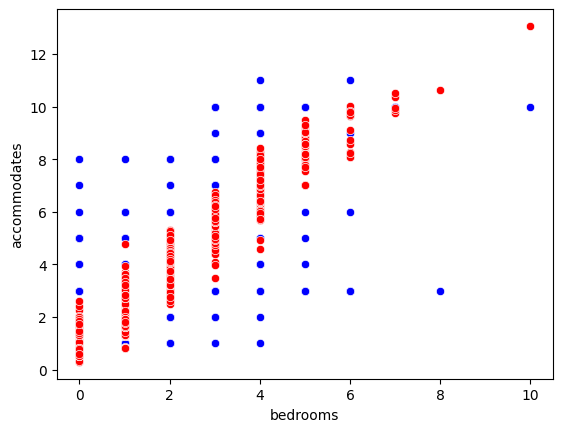

In [1400]:
# Gráfica de comparación
sns.scatterplot(x = 'bedrooms', y = 'accommodates', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'bedrooms', y = 'Predict_Accommodates', color = "red", data = dfPredict)

### bedrooms

<Axes: >

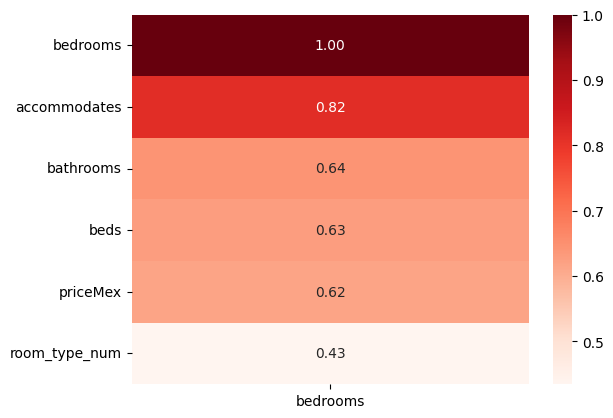

In [1401]:
# Filtrando las correlaciones fuertes
bedroomsModel = abs(df.corr()['bedrooms'])
bedroomsModel = bedroomsModel[bedroomsModel.abs() > 0.30].sort_values(ascending=False).to_frame()
bedroomsModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map7 = sns.heatmap(bedroomsModel, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map7

In [1402]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[['accommodates', 'bathrooms', 'beds', 'priceMex','room_type_num']] # Independiente = x
Var_Dep = df[["bedrooms"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[['accommodates', 'bathrooms', 'beds', 'priceMex','room_type_num']])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_Bedrooms', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_7 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_7 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_7 = np.sqrt(coef_Deter_7)
coef_Correl_7 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.8577468915361853

In [1403]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bathrooms', 'beds', 'priceMex', 'room_type_num'],
       dtype=object),
 'n_features_in_': 5,
 'coef_': array([[2.98254888e-01, 4.27611364e-01, 8.12549455e-02, 7.28018505e-05,
         1.98650554e-02]]),
 'rank_': 5,
 'singular_': array([7.69385234e+04, 1.00795546e+02, 5.00651677e+01, 3.02666567e+01,
        2.02229303e+01]),
 'intercept_': array([-0.17484927])}

**Modelo Matemático: y = 2.98254888e-01x1 + 4.27611364e-01x2 + 8.12549455e-02x3 + 7.28018505e-05x4 + 1.98650554e-02x5 - 0.17484927**

<Axes: xlabel='accommodates', ylabel='bedrooms'>

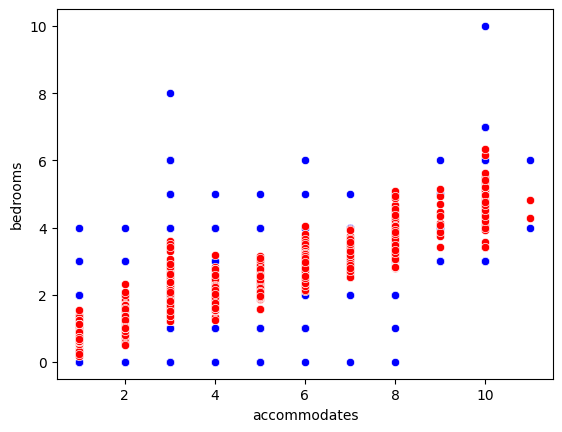

In [1404]:
# Gráfica de comparación
sns.scatterplot(x = 'accommodates', y = 'bedrooms', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'accommodates', y = 'Predict_Bedrooms', color = "red", data = dfPredict)

### Price_Mex

<Axes: >

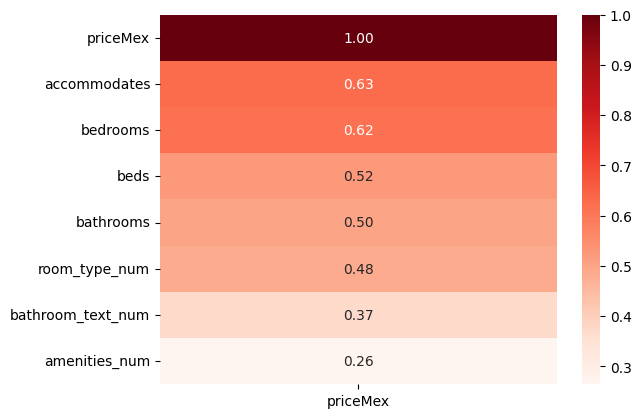

In [1405]:
# Filtrando las correlaciones fuertes
PriceModel = abs(df.corr()['priceMex'])
PriceModel = PriceModel[PriceModel.abs() > 0.20].sort_values(ascending=False).to_frame()
PriceModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map8 = sns.heatmap(PriceModel, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map8

In [1406]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[['accommodates', 'bedrooms', 'beds', 'bathrooms', 'room_type_num', 'bathroom_text_num', 'amenities_num']] # Independiente = x
Var_Dep = df[["priceMex"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[['accommodates', 'bedrooms', 'beds', 'bathrooms', 'room_type_num', 'bathroom_text_num', 'amenities_num']])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_priceMex', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_8 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_8 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_8 = np.sqrt(coef_Deter_8)
coef_Correl_8 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.701984894735759

In [1407]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bedrooms', 'beds', 'bathrooms', 'room_type_num',
        'bathroom_text_num', 'amenities_num'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([[ 105.85444897,  221.16301209,  119.72196095,  402.83673546,
         -507.64778738, -125.68842754,    4.62626067]]),
 'rank_': 7,
 'singular_': array([833.45673037, 137.28808157,  50.38084158,  41.84577634,
         34.26639537,  24.96653827,  15.76319578]),
 'intercept_': array([987.34054365])}

**Modelo Matemático: y = 105.85444897x1 + 221.16301209x2 + 119.72196095x3 + 402.83673546x4 - 507.64778738x5 - 125.68842754x6 + 4.62626067x7 + 987.34054365**

<Axes: xlabel='accommodates', ylabel='priceMex'>

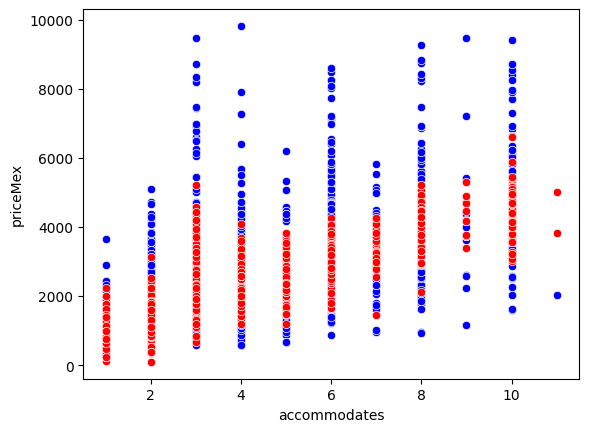

In [1408]:
# Gráfica de comparación
sns.scatterplot(x = 'accommodates', y = 'priceMex', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'accommodates', y = 'Predict_priceMex', color = "red", data = dfPredict)

### review_scores_value 

<Axes: >

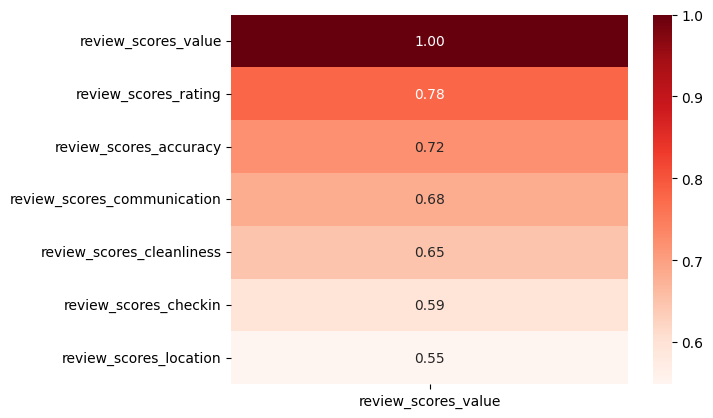

In [1409]:
# Filtrando las correlaciones fuertes
reviewScoresModel = abs(df.corr()['review_scores_value'])
reviewScoresModel = reviewScoresModel[reviewScoresModel.abs() > 0.20].sort_values(ascending=False).to_frame()
reviewScoresModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map9 = sns.heatmap(reviewScoresModel, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map9

In [1410]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[['review_scores_rating', 'review_scores_accuracy','review_scores_communication', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_location']] # Independiente = x
Var_Dep = df[["review_scores_value"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[['review_scores_rating', 'review_scores_accuracy','review_scores_communication', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_location']])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_ReviewScores', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_9 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_9 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_9 = np.sqrt(coef_Deter_9)
coef_Correl_9 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.8218879877881647

In [1411]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating', 'review_scores_accuracy',
        'review_scores_communication', 'review_scores_cleanliness',
        'review_scores_checkin', 'review_scores_location'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([[0.4387493 , 0.18324504, 0.23187418, 0.13724311, 0.01301049,
         0.18685184]]),
 'rank_': 6,
 'singular_': array([37.85607822, 14.24646461, 13.62148546, 11.21544578,  8.9461707 ,
         8.13487136]),
 'intercept_': array([-0.99106445])}

**Modelo Matemático: y = 0.4387493x1 + 0.18324504x2 + 0.23187418x3 + 0.13724311x4 + 0.01301049x5 + 0.18685184x6 - 0.99106445**

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

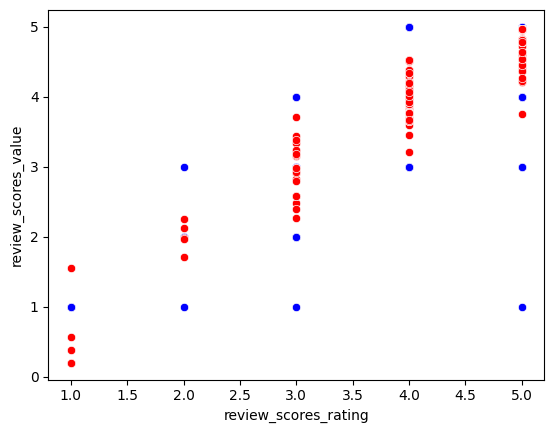

In [1412]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_rating', y = 'review_scores_value', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'review_scores_rating', y = 'Predict_ReviewScores', color = "red", data = dfPredict)

### reviews_per_month

<Axes: >

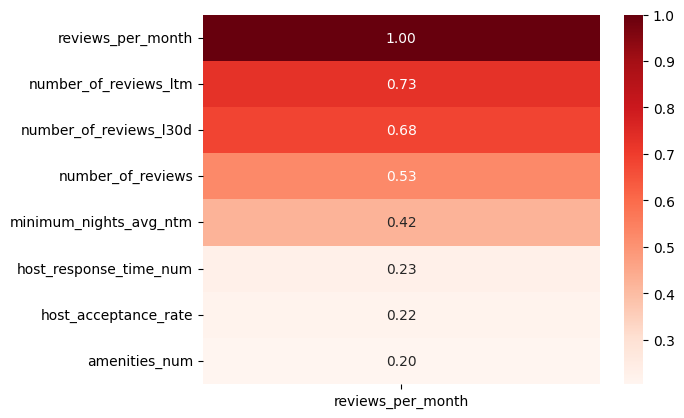

In [1413]:
# Filtrando las correlaciones fuertes
reviewsMonthModel = abs(df.corr()['reviews_per_month'])
reviewsMonthModel = reviewsMonthModel[reviewsMonthModel.abs() > 0.20].sort_values(ascending=False).to_frame()
reviewsMonthModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map10 = sns.heatmap(reviewsMonthModel, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map10

In [1415]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[['review_scores_rating', 'number_of_reviews_ltm','number_of_reviews_l30d', 'number_of_reviews','minimum_nights_avg_ntm', 'host_response_time_num','host_acceptance_rate', 'amenities_num']] # Independiente = x
Var_Dep = df[["reviews_per_month"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[['review_scores_rating', 'number_of_reviews_ltm','number_of_reviews_l30d', 'number_of_reviews','minimum_nights_avg_ntm', 'host_response_time_num','host_acceptance_rate', 'amenities_num']])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_ReviewsMonth', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_10 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_10 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_10 = np.sqrt(coef_Deter_10)
coef_Correl_10 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.781454499864303

In [1416]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating', 'number_of_reviews_ltm',
        'number_of_reviews_l30d', 'number_of_reviews',
        'minimum_nights_avg_ntm', 'host_response_time_num',
        'host_acceptance_rate', 'amenities_num'], dtype=object),
 'n_features_in_': 8,
 'coef_': array([[ 0.13719787,  0.02835837,  0.22543282,  0.00535834, -0.01073728,
          0.0747187 ,  0.00088037, -0.00512764]]),
 'rank_': 8,
 'singular_': array([2809.73019347, 1204.79531175, 1014.45525089,  778.91595666,
         696.4249477 ,   82.53505723,   33.50243575,   19.8636314 ]),
 'intercept_': array([0.24435816])}

**Modelo Matemático: y = 0.13719787x1 + 0.02835837x2 + 0.22543282x3 + 0.00535834x4 - 0.01073728x5 + 0.0747187x6 + 0.00088037x7 - 0.00512764x8 + 0.24435816**

<Axes: xlabel='review_scores_rating', ylabel='reviews_per_month'>

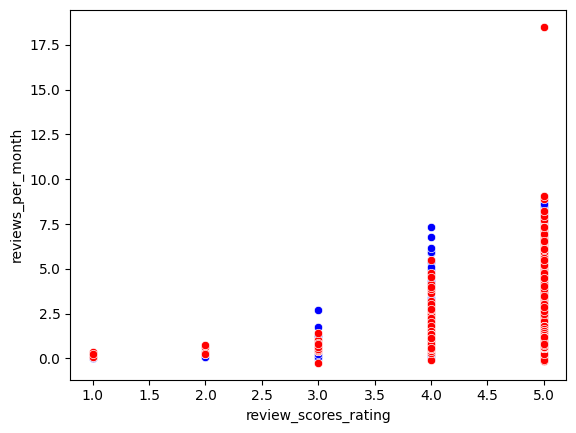

In [1417]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_rating', y = 'reviews_per_month', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'review_scores_rating', y = 'Predict_ReviewsMonth', color = "red", data = dfPredict)